In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv'
df = pd.read_csv(url)

# Create a 'Satisfaction' variable based on the 'Rating_Given' category
# Assuming 'Rating_Given' is on a scale of 1 to 5
df['Satisfaction'] = df['Rating_Given']

# Convert subscription dates to datetime format and extract the quarter
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])
df['Quarter'] = df['Subscription_Start_Date'].dt.to_period('Q')

# Group by quarter and subscription type and calculate the average satisfaction level
average_satisfaction = df.groupby(['Quarter', 'Subscription_Type'])['Satisfaction'].mean().reset_index()

# Display the result
print(average_satisfaction)



   Quarter Subscription_Type  Satisfaction
0   2019Q2             Basic      2.625000
1   2019Q2           Premium      2.400000
2   2019Q2          Standard      3.500000
3   2019Q3             Basic      2.851852
4   2019Q3           Premium      3.545455
..     ...               ...           ...
58  2024Q1           Premium      3.000000
59  2024Q1          Standard      2.750000
60  2024Q2             Basic      2.500000
61  2024Q2           Premium      2.750000
62  2024Q2          Standard      3.000000

[63 rows x 3 columns]


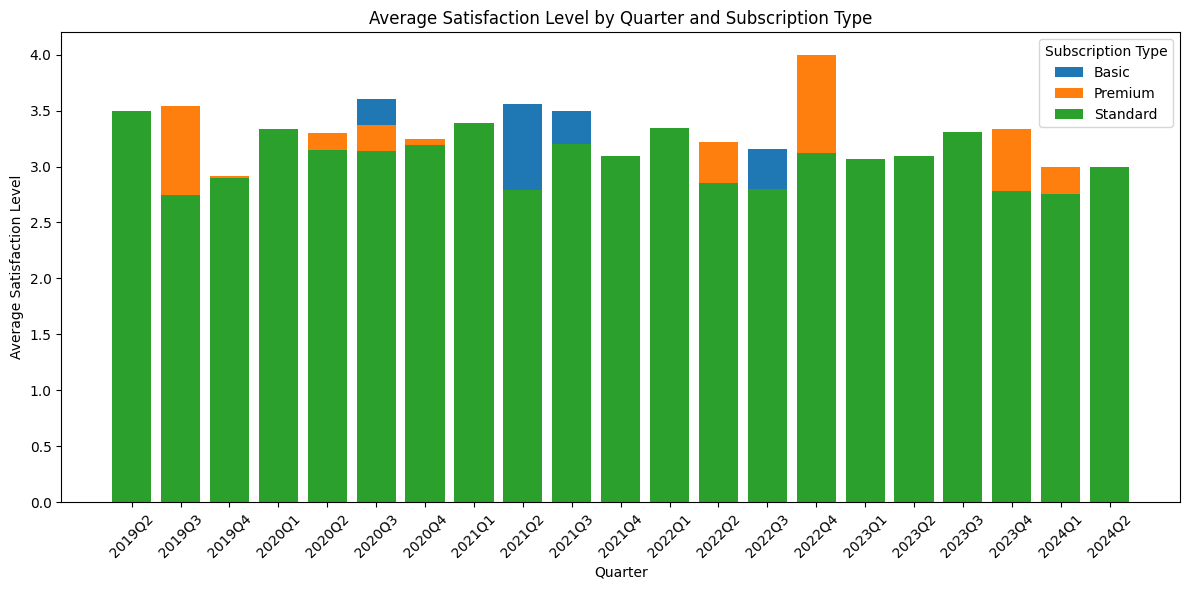

In [7]:
# Plotting the data using matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate over each subscription type and plot
for subscription_type in average_satisfaction['Subscription_Type'].unique():
    subset = average_satisfaction[average_satisfaction['Subscription_Type'] == subscription_type]
    ax.bar(subset['Quarter'].astype(str), subset['Satisfaction'], label=subscription_type)

# Add labels and title
ax.set_xlabel('Quarter')
ax.set_ylabel('Average Satisfaction Level')
ax.set_title('Average Satisfaction Level by Quarter and Subscription Type')
ax.legend(title='Subscription Type')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [67]:
def value(group):
    if group['Rating_Given'] == 5:
        return 'Very Satisfied'
    elif group['Rating_Given'] == 4 or group['Rating_Given'] == 3:
        return 'Satisfied'
    else:
        return 'Disatisfied'

In [71]:
df['Satisfaction_level'] = df.apply(value, axis=1)
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Satisfaction,Quarter,Satisfaction_level
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN,5,2020Q2,Very Satisfied
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN,1,2024Q1,Disatisfied
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN,2,2022Q4,Disatisfied
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN,1,2022Q1,Disatisfied
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN,4,2020Q1,Satisfied


In [78]:
churned_df = df[df['Churned'] == 1]

In [86]:
standard_churned_users = churned_df.groupby('Subscription_Type')['Satisfaction_level'].value_counts()
print(standard_churned_users)
      

Subscription_Type  Satisfaction_level
Basic              Disatisfied           35
                   Satisfied             30
                   Very Satisfied         8
Premium            Disatisfied           28
                   Satisfied             16
                   Very Satisfied         5
Standard           Disatisfied           65
                   Satisfied             47
                   Very Satisfied        12
Name: count, dtype: int64


In [23]:
unique_m = df.groupby('Favorite_Genre')['Content_ID'].apply(lambda x: list(set(x))).reset_index()
print(unique_m.sum())

Favorite_Genre                   ActionComedyDocumentaryDramaSci-Fi
Content_ID        [1024, 1025, 1026, 1027, 1030, 1032, 1033, 103...
dtype: object


In [48]:
#Avg age group within each subscription type

age = churned_df.groupby('Subscription_Type')['Age'].mean()
print(age)

Subscription_Type
Basic       41.616438
Premium     44.102041
Standard    43.725806
Name: Age, dtype: float64


In [56]:
genders_by_subscription = churned_df.groupby('Subscription_Type')['Gender'].apply(lambda x: list(set(x))).reset_index()

# Display the result
print(genders_by_subscription)

for index, row in genders_by_subscription.iterrows():
    subscription_type = row['Subscription_Type']
    genders = ', '.join(row['Gender'])
    print(f"{subscription_type}: {genders}")

  Subscription_Type                 Gender
0             Basic  [Female, Other, Male]
1           Premium  [Male, Other, Female]
2          Standard  [Male, Other, Female]
Basic: Female, Other, Male
Premium: Male, Other, Female
Standard: Male, Other, Female


In [58]:
# Group by subscription type and gender, then count the occurrences
gender_counts_by_subscription = churned_df.groupby(['Subscription_Type', 'Gender']).size().reset_index(name='Count')

# Calculate the total count for each subscription type
total_counts_by_subscription = churned_df.groupby('Subscription_Type').size().reset_index(name='Total_Count')

# Merge the total counts with the gender counts
gender_counts_with_totals = pd.merge(gender_counts_by_subscription, total_counts_by_subscription, on='Subscription_Type')

# Calculate the percentage
gender_counts_with_totals['Percentage'] = (gender_counts_with_totals['Count'] / gender_counts_with_totals['Total_Count']) * 100

# Display the result
print(gender_counts_with_totals)

  Subscription_Type  Gender  Count  Total_Count  Percentage
0             Basic  Female     24           73   32.876712
1             Basic    Male     24           73   32.876712
2             Basic   Other     25           73   34.246575
3           Premium  Female     16           49   32.653061
4           Premium    Male     18           49   36.734694
5           Premium   Other     15           49   30.612245
6          Standard  Female     45          124   36.290323
7          Standard    Male     33          124   26.612903
8          Standard   Other     46          124   37.096774


In [64]:
# Group by subscription type and favorite genre, then count the occurrences
genre_counts_by_subscription = churned_df.groupby(['Subscription_Type', 'Favorite_Genre']).size().reset_index(name='Count')

# Pivot the table to display counts of favorite genres for each subscription type
pivot_table = genre_counts_by_subscription.pivot(index='Subscription_Type', columns='Favorite_Genre', values='Count').fillna(0)

# Display the pivot table
print(pivot_table)

Favorite_Genre     Action  Comedy  Documentary  Drama  Sci-Fi
Subscription_Type                                            
Basic                  13      10           13     13      24
Premium                12       9           11     11       6
Standard               24      30           28     23      19


In [95]:
#Find Relationship between Price and Satisfaction

df['Price'] = df['Monthly_Payment']

satisfaction_price = df.groupby('Price')['Satisfaction_level'].value_counts()

print(satisfaction_price)

Price  Satisfaction_level
9.99   Satisfied             113
       Disatisfied           108
       Very Satisfied         55
14.99  Disatisfied           214
       Satisfied             198
       Very Satisfied        118
19.99  Disatisfied            81
       Satisfied              75
       Very Satisfied         38
Name: count, dtype: int64


In [93]:
print(df['Satisfaction_level'].value_counts())

Satisfaction_level
Disatisfied       403
Satisfied         386
Very Satisfied    211
Name: count, dtype: int64


TypeError: Invalid object type at position 0

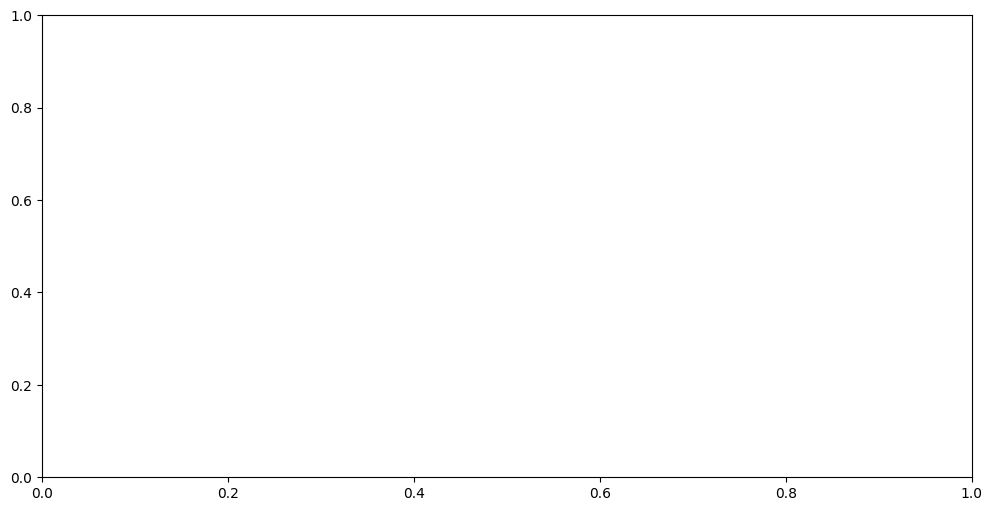